Using Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
print(type(cancer)) #object "Bunch" is like dictionary
print(cancer.keys())
print(cancer.target_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']


In [3]:

# Number of features of the breast cancer dataset
len(cancer['feature_names'])

30

In [4]:
features = cancer['feature_names']
print(features)
print(len(features))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [5]:
#Converting "Bunch" object to DataFrame   
data1 = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']], 
                         columns= cancer['feature_names'].tolist() + ['target'])
data1.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:

#Finding class distribution
dist = data1.target.value_counts()
dist.rename({0.0: 'malignant', 1.0:'benign'})


benign       357
malignant    212
Name: target, dtype: int64

In [7]:
#Split data and labels
X = data1.iloc[:,0:30]
y = data1.target


In [8]:
#Split train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [9]:
#Using K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train.values)


KNeighborsClassifier()

In [10]:
means = data1.mean()[:-1].values.reshape(1, -1)
print(means)
   
my_prediction = knn.predict(means)


[[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
  9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
  1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
  2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
  3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
  1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
  1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
  2.90075571e-01 8.39458172e-02]]


In [11]:
   
second_prediction = knn.predict(X_test.values)
second_prediction

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])

In [12]:
knn.score(X_test.values, y_test.values)


0.9370629370629371

<Figure size 432x288 with 0 Axes>

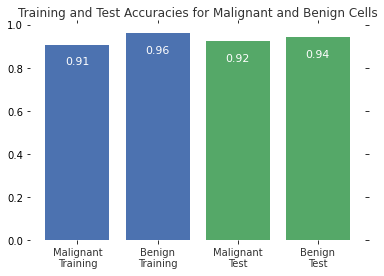

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline


# Find the training and testing accuracies by target value (i.e. malignant, benign)
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]
mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]
scores = [knn.score(mal_train_X.values, mal_train_y.values), knn.score(ben_train_X.values, ben_train_y.values), 
          knn.score(mal_test_X.values, mal_test_y.values), knn.score(ben_test_X.values, ben_test_y.values)]

bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                 ha='center', color='w', fontsize=11)# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8)
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
plt.figure()# Plot the scores as a bar chart